In [1]:
library("vegan")
data("dune")
data("dune.env")


ERROR: Error in library("vegan"): there is no package called 'vegan'


In [2]:
# Load the vegan package
library(vegan)

# Load the dune and dune.env datasets
data("dune")
data("dune.env")


ERROR: Error in library(vegan): there is no package called 'vegan'


In [3]:
# Perform CCA
dune_cca <- cca(dune ~ ., data = dune.env)

# View the summary of the CCA result
summary(dune_cca)


ERROR: Error in cca(dune ~ ., data = dune.env): could not find function "cca"


In [4]:
# Basic CCA plot
plot(dune_cca, main = "Canonical Correspondence Analysis (CCA) of Dune Data")

# Customize the plot with species and site labels
plot(dune_cca, display = c("species", "sites"), 
     main = "CCA of Dune Data with Species and Site Labels", 
     col = c("blue", "red"))


ERROR: Error: object 'dune_cca' not found


In [11]:
# CCA biplot (environmental variables and sites)
biplot(dune_cca, main = "Biplot of CCA: Environmental Variables and Sites")

# Triplot showing species, sites, and environmental variables
plot(dune_cca, display = c("species", "sites", "biplot"),
     main = "Triplot: CCA of Dune Data",
     col = c("blue", "red", "green"))


ERROR: Error in biplot.cca(dune_cca, main = "Biplot of CCA: Environmental Variables and Sites"): biplot can be used only with linear ordination (e.g., PCA)


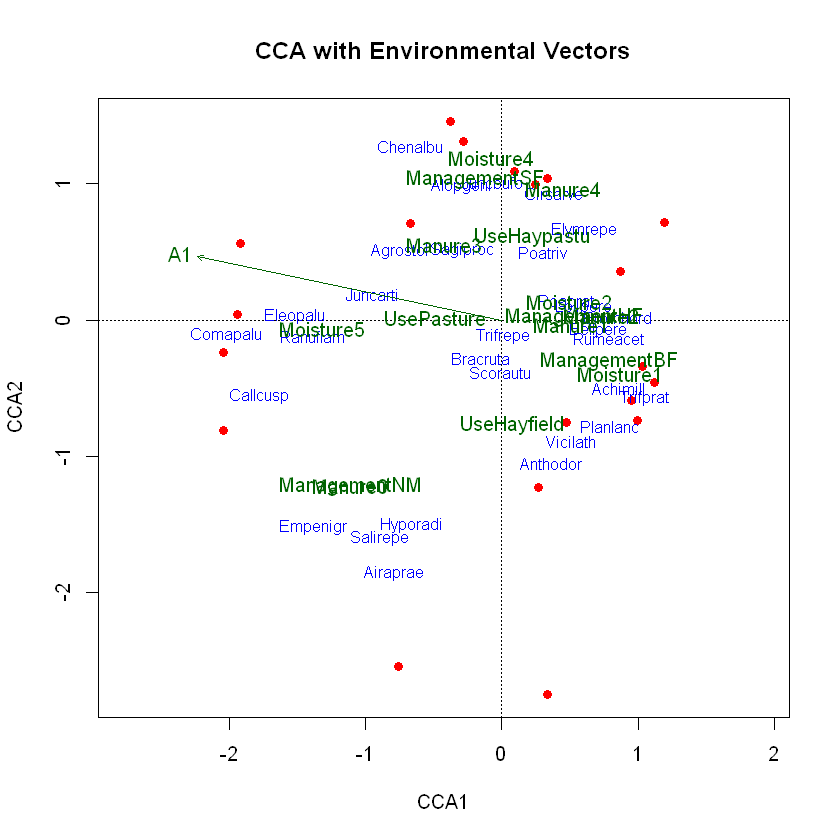

In [12]:
# Enhanced plot with environmental vectors
plot(dune_cca, main = "CCA with Environmental Vectors", type = "n")
points(dune_cca, display = "sites", col = "red", pch = 16)
text(dune_cca, display = "species", col = "blue", cex = 0.8)
envfit_result <- envfit(dune_cca, dune.env, perm = 999)
plot(envfit_result, col = "darkgreen")


In [21]:
# Install the necessary packages if you don't have them already
if (!requireNamespace("vegan", quietly = TRUE)) install.packages("vegan")
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
if (!requireNamespace("dplyr", quietly = TRUE)) install.packages("dplyr")

# Load the required libraries
library(vegan)
library(ggplot2)
library(dplyr)



Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [22]:
# Load the dune and dune.env datasets
data("dune")
data("dune.env")

# Perform CCA
dune_cca <- cca(dune ~ ., data = dune.env)


In [23]:
# Extract site scores (coordinates for samples)
site_scores <- as.data.frame(scores(dune_cca, display = "sites"))
site_scores$Site <- rownames(site_scores)

# Extract species scores (coordinates for species)
species_scores <- as.data.frame(scores(dune_cca, display = "species"))
species_scores$Species <- rownames(species_scores)

# Extract environmental variable vectors
env_vectors <- as.data.frame(scores(dune_cca, display = "bp"))
env_vectors$Variable <- rownames(env_vectors)


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


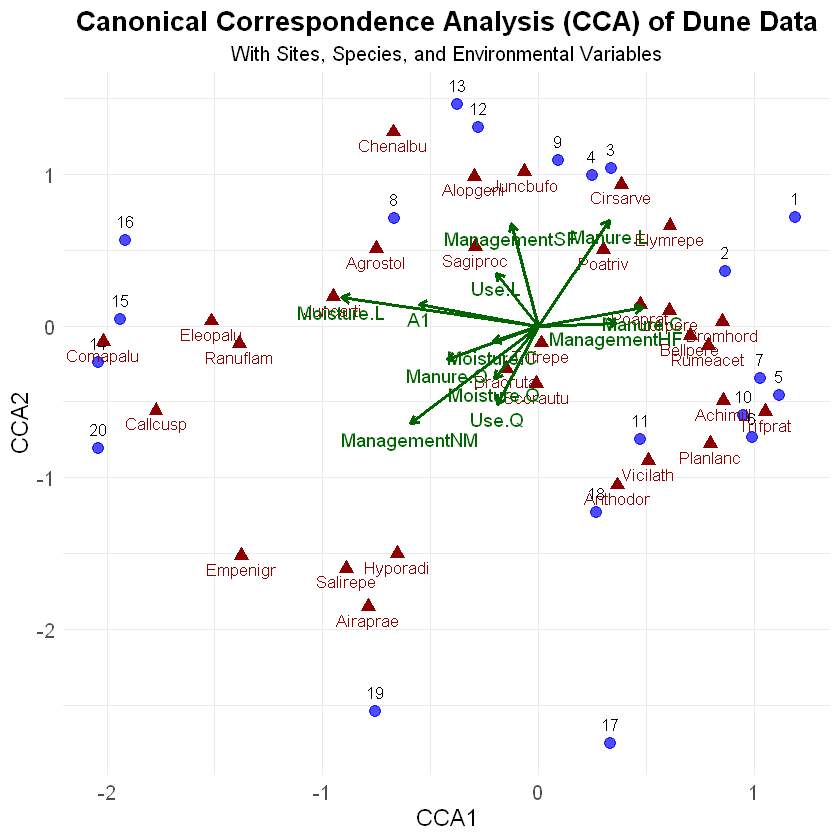

In [24]:
# Plot the CCA results using ggplot2
ggplot() +
  # Plot sites
  geom_point(data = site_scores, aes(x = CCA1, y = CCA2), 
             color = "blue", size = 3, alpha = 0.7) +
  geom_text(data = site_scores, aes(x = CCA1, y = CCA2, label = Site),
            vjust = -1, size = 3.5) +
  
  # Plot species
  geom_point(data = species_scores, aes(x = CCA1, y = CCA2), 
             color = "darkred", size = 3, shape = 17) +
  geom_text(data = species_scores, aes(x = CCA1, y = CCA2, label = Species),
            vjust = 1.5, size = 3.5, color = "darkred") +
  
  # Plot environmental vectors
  geom_segment(data = env_vectors, aes(x = 0, y = 0, xend = CCA1, yend = CCA2),
               arrow = arrow(length = unit(0.2, "cm")), color = "darkgreen", size = 1) +
  geom_text(data = env_vectors, aes(x = CCA1, y = CCA2, label = Variable),
            vjust = 1.5, size = 4, color = "darkgreen") +
  
  # Customize the theme and labels
  theme_minimal() +
  labs(title = "Canonical Correspondence Analysis (CCA) of Dune Data",
       subtitle = "With Sites, Species, and Environmental Variables",
       x = "CCA1", y = "CCA2") +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5, size = 12),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))


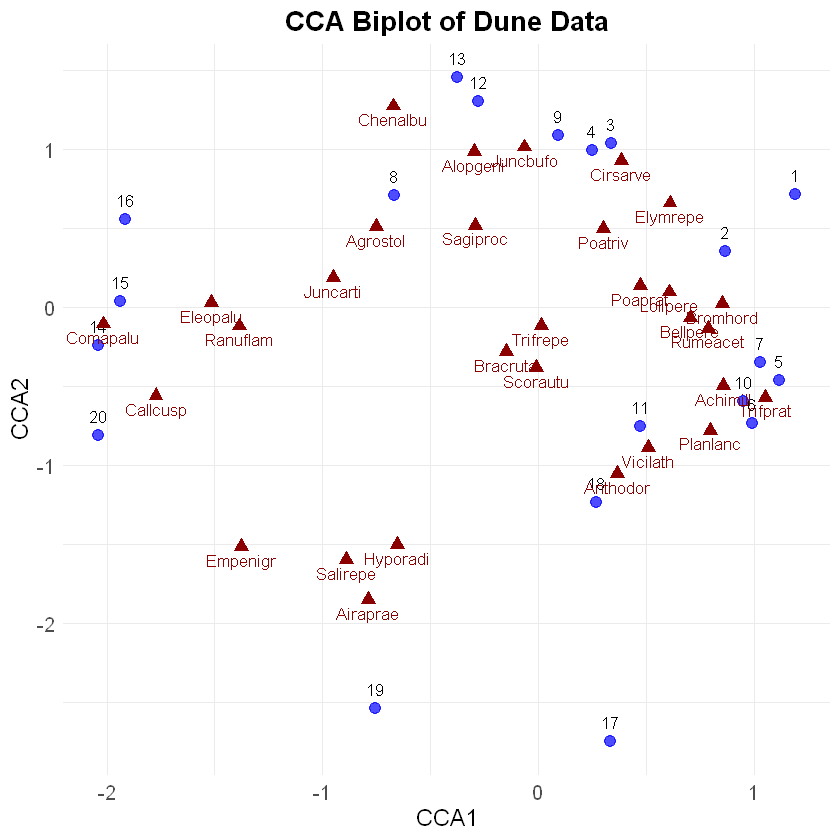

In [25]:
ggplot() +
  # Plot sites
  geom_point(data = site_scores, aes(x = CCA1, y = CCA2), 
             color = "blue", size = 3, alpha = 0.7) +
  geom_text(data = site_scores, aes(x = CCA1, y = CCA2, label = Site),
            vjust = -1, size = 3.5) +
  
  # Plot species
  geom_point(data = species_scores, aes(x = CCA1, y = CCA2), 
             color = "darkred", size = 3, shape = 17) +
  geom_text(data = species_scores, aes(x = CCA1, y = CCA2, label = Species),
            vjust = 1.5, size = 3.5, color = "darkred") +
  
  # Customize the theme and labels
  theme_minimal() +
  labs(title = "CCA Biplot of Dune Data",
       x = "CCA1", y = "CCA2") +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))


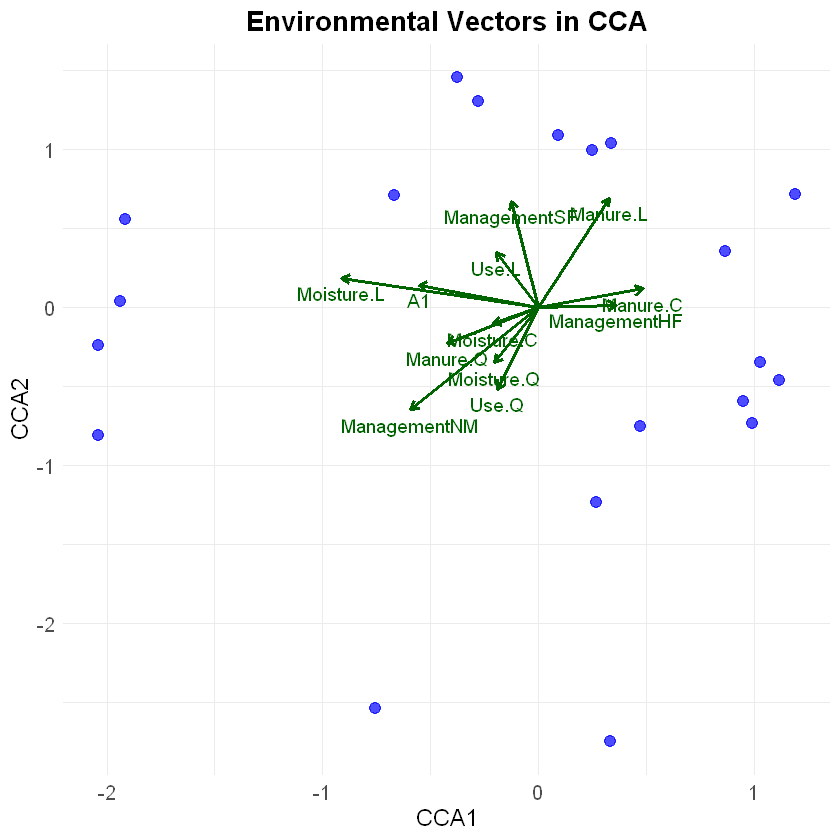

In [26]:
ggplot() +
  # Plot sites
  geom_point(data = site_scores, aes(x = CCA1, y = CCA2), 
             color = "blue", size = 3, alpha = 0.7) +
  
  # Plot environmental vectors
  geom_segment(data = env_vectors, aes(x = 0, y = 0, xend = CCA1, yend = CCA2),
               arrow = arrow(length = unit(0.2, "cm")), color = "darkgreen", size = 1) +
  geom_text(data = env_vectors, aes(x = CCA1, y = CCA2, label = Variable),
            vjust = 1.5, size = 4, color = "darkgreen") +
  
  # Customize the theme and labels
  theme_minimal() +
  labs(title = "Environmental Vectors in CCA",
       x = "CCA1", y = "CCA2") +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))
